In [17]:
from task_offloading_moo.pymoo.algorithms.puma_optimizer import PumaOptimizer
from task_offloading_moo.pymoo.problem import TaskOffloadingProblem
from task_offloading_moo.pymoo.operators.repair import TaskOffloadingRepair
from task_offloading_moo.pymoo.operators.sampling import TaskOffloadingSampling
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

In [18]:
pop_size = 100
n_max_iters = 50

num_cloud_machines = 30
num_fog_machines = 20
num_tasks = 500

algorithm = PumaOptimizer(repair=TaskOffloadingRepair(),
                      use_soft_repair=True,
                      pop_size=pop_size,
                      sampling=TaskOffloadingSampling(),
                      n_max_iters=n_max_iters,
                      archive_size=100,
                      save_history=True,
                      )

problem = TaskOffloadingProblem(num_cloud_machines, num_fog_machines, num_tasks, use_random_machines=True)

In [19]:
res = minimize(problem,
           algorithm,
           seed=1,
           verbose=True)

n_gen  |  n_eval  |     explor    |    exploit    |   is_explore  | n_nds  |      eps      |   indicator  
     1 |      100 |             0 |             0 |            no |      9 |             - |             -
     2 |      100 |  0.6666666667 |  0.1666666667 |           yes |    100 |  0.1317690110 |         ideal
     3 |      106 |  0.000000E+00 |  0.6653333333 |            no |      9 |  0.0191026782 |         ideal
     4 |      106 |  0.0120000000 |  2.6400000000 |            no |      9 |  0.000000E+00 |             f
     5 |      106 |  0.0003308118 |  1.973631E-21 |           yes |      9 |  0.000000E+00 |             f
     6 |      111 |  0.000000E+00 |  0.0001102706 |            no |      8 |  0.0029534840 |             f
     7 |      111 |  0.0001102706 |  1.973631E-21 |           yes |      8 |  0.000000E+00 |             f
     8 |      113 |  0.000000E+00 |  0.0001102706 |            no |      8 |  0.000000E+00 |             f
     9 |      113 |  0.0001102706 |  

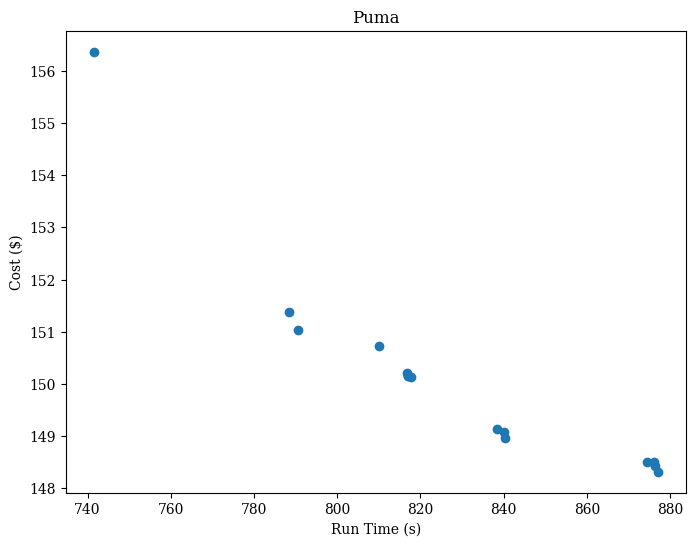

In [20]:
# print(f"Best population found:\n {res.X} \nwith F:\n{res.F}")

plot = Scatter(title="Puma")
plot.add(res.F)
plot.axis_labels = problem.dataset_generator.get_objective_names()
_ = plot.show()

In [21]:
# res.archive.get("F")

In [22]:
for i in range(len(res.history)):
    s_opt = res.history[i].opt.get('F').shape
    s_pop = res.history[i].pop.get('F').shape
    
    if s_opt[1] != s_pop[1]:
        print(f"Rewriting {i}: {s_opt} -> {s_pop}")

In [23]:
import os
from task_offloading_moo.utils.utils import save_generations_video_pymoo

out_path = os.path.join(os.path.dirname(os.getcwd()), "output")
save_generations_video_pymoo(res.history, out_path, "puma_video")


In [24]:
# plot = Scatter(title="Puma")
# plot.add(res.archive.get("F"))
# plot.axis_labels = problem.dataset_generator.get_objective_names()
# _ = plot.show()